# Machine Learning I Final Project

Team 4

Rebecca Li, Jackie Li, Chris Chou, Niki Baskar

In [1]:
# import packages
import pandas as pd
import math
from datetime import datetime
import numpy as np
from keras.models import Model
from keras.layers import Dense, Activation, Dropout, BatchNormalization, Embedding, Flatten, Input, concatenate
from keras_tuner import BayesianOptimization, RandomSearch
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import keras.backend as K
import sklearn
import category_encoders as ce
from keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.metrics import log_loss
from keras import regularizers
from sklearn.model_selection import train_test_split
from keras import initializers

# 1. Data Exploration

## Data Import

In [2]:
# Import the training data
train = pd.read_csv('Project Data/ProjectTrainingData.csv')

In [3]:
# Import the test data
test = pd.read_csv('Project Data/ProjectTestData.csv')

## Data Overview

In [4]:
# Explore the training data
train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [5]:
train.shape
# there are 31991090 rows and 24 columns
# sample 1% if possible

(31991090, 24)

In [6]:
train.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,3.199109e+07,3.199109e+07,3.199109e+07,3.199109e+07,3.199109e+07,3.199109e+07,3.199109e+07,3.199109e+07,3.199109e+07,3.199109e+07,3.199109e+07,3.199109e+07,3.199109e+07,3.199109e+07,3.199109e+07
mean,9.222850e+18,1.698903e-01,1.410251e+07,1.004971e+03,2.939784e-01,1.018130e+00,3.284549e-01,1.858369e+04,3.188418e+02,6.016075e+01,2.080636e+03,1.432229e+00,2.218796e+02,5.363977e+04,8.055030e+01
std,5.325227e+18,3.755364e-01,2.675669e+02,1.115785e+00,5.104750e-01,5.406309e-01,8.561166e-01,4.977359e+03,2.156021e+01,4.756263e+01,6.098611e+02,1.323205e+00,3.496583e+02,4.992806e+04,6.698771e+01
min,5.211594e+11,0.000000e+00,1.410210e+07,1.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.750000e+02,1.200000e+02,2.000000e+01,1.120000e+02,0.000000e+00,3.300000e+01,-1.000000e+00,1.000000e+00
25%,4.611571e+18,0.000000e+00,1.410222e+07,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.661500e+04,3.200000e+02,5.000000e+01,1.800000e+03,0.000000e+00,3.500000e+01,-1.000000e+00,2.300000e+01
50%,9.223074e+18,0.000000e+00,1.410251e+07,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,2.015300e+04,3.200000e+02,5.000000e+01,2.299000e+03,2.000000e+00,3.900000e+01,1.000550e+05,6.100000e+01
75%,1.383506e+19,0.000000e+00,1.410280e+07,1.005000e+03,1.000000e+00,1.000000e+00,0.000000e+00,2.177000e+04,3.200000e+02,5.000000e+01,2.506000e+03,3.000000e+00,1.690000e+02,1.000940e+05,9.100000e+01
max,1.844674e+19,1.000000e+00,1.410292e+07,1.012000e+03,7.000000e+00,5.000000e+00,5.000000e+00,2.383600e+04,1.024000e+03,1.024000e+03,2.729000e+03,3.000000e+00,1.959000e+03,1.002480e+05,2.530000e+02


In [7]:
# check missing value
train.isna().sum()
# No missing values

id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64

## Categorical Data Exploration

### site_id

In [11]:
# check the number of unique values for each column
train['site_id'].nunique()

4581

In [35]:
# check the frequency distribution of values
dist_site_id = df.groupby(by = 'site_id').count()['click'].sort_values(ascending = False).to_frame()

<AxesSubplot:xlabel='site_id'>

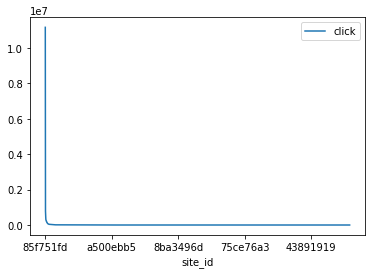

In [36]:
# visualize the frequency distribution
dist_site_id.plot()

the distribution is extremely unbalanced. we try to set the values with small frequency to "others"

In [58]:
# set 99% as a threshold; that is, the 1% site_id with smallest frequencies will be set as "others"
freq_99 = dist_site_id.quantile(0.99)
# check the number of site_id above 99%
dist_site_id[dist_site_id >= freq_99].count()

click    46
dtype: int64

Then the new column should contain 47 variables. we can do encoding then

In [56]:
dist_site_id.iloc[:,0]

site_id
85f751fd    11170690
1fbe01fe     5216249
e151e245     2095395
d9750ee7      786829
5b08c53b      719069
              ...   
56bddb22           1
c0621036           1
57081af1           1
e7a70464           1
48617f7f           1
Name: click, Length: 4581, dtype: int64

### site_domain

In [12]:
df['site_domain'].nunique()

7341

### site_category

In [30]:
df['site_category'].nunique()


26

we can use label encoding to process this column

# 2. Data Processing

id

In [3]:
# Drop the id column; index column is usually not insightful for machine learning models
df = df.drop(['id'], axis=1)

hour

In [4]:
# Divide the hour column into two: Day & Hour
df['Day'] = df['hour'] // 100
df['Hour'] = df['hour'] - df['Day'] * 100

In [5]:
# Delete the original hour column
df = df.drop(['hour'], axis = 1)

site_category

In [16]:
# Encoding the site_category using label encoding
encoder = ce.OrdinalEncoder(cols=['site_category'], return_df=True)
encoder.fit_transform(df)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,1,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,1,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,1,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,1,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,2,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31991085,9.999439e+18,0,14102923,1005,0,85f751fd,c4e18dd6,4,e2fcccd2,5c5a694b,...,1,0,20633,320,50,2374,3,39,-1,23
31991086,9.999452e+18,0,14102923,1005,1,e151e245,7e091613,3,ecad2386,7801e8d9,...,1,0,17747,320,50,1974,2,39,-1,33
31991087,9.999621e+18,0,14102923,1005,0,85f751fd,c4e18dd6,4,92f5800b,ae637522,...,1,3,21191,320,50,2424,1,161,100193,71
31991088,9.999800e+18,0,14102923,1005,1,ce3307ec,7e091613,3,ecad2386,7801e8d9,...,1,0,23626,320,50,2707,3,937,100156,61


app_id, app_domain, app_category

In [11]:
df['app_id'].nunique()

8088

In [12]:
df['app_domain'].nunique()

526

In [13]:
df['app_category'].nunique()

36

In [17]:
# Encoding the app_category using label encoding
encoder = ce.OrdinalEncoder(cols=['app_category'], return_df=True)
encoder.fit_transform(df)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31991085,9.999439e+18,0,14102923,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,...,1,0,20633,320,50,2374,3,39,-1,23
31991086,9.999452e+18,0,14102923,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,17747,320,50,1974,2,39,-1,33
31991087,9.999621e+18,0,14102923,1005,0,85f751fd,c4e18dd6,50e219e0,92f5800b,ae637522,...,1,3,21191,320,50,2424,1,161,100193,71
31991088,9.999800e+18,0,14102923,1005,1,ce3307ec,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,23626,320,50,2707,3,937,100156,61


device_id, device_ip, device_model

In [ ]:
df.drop('device_id', axis=1)
df.drop('device_ip', axis=1)

In [22]:
df['device_model'].nunique()

8058

C1, C14-21

In [24]:
df['C1'].nunique()

7

In [25]:
df['C14'].nunique()

2465

In [26]:
df['C15'].nunique()

8

In [27]:
df['C16'].nunique()

9

In [28]:
df['C17'].nunique()

407

In [29]:
df['C18'].nunique()

4

In [30]:
df['C19'].nunique()

66

In [31]:
df['C20'].nunique()

171

In [32]:
df['C21'].nunique()

55